In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import *
import nltk, datetime
import seaborn as sns

import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Splitting the dataset to train and test datasets

In [3]:
train = pd.read_csv('../input/sales_train.csv')
test = pd.read_csv('../input/test.csv')
submission = pd.read_csv('../input/sample_submission.csv')
items = pd.read_csv('../input/items.csv')
item_categories = pd.read_csv('../input/item_categories.csv')
shops = pd.read_csv('../input/shops.csv')
print('train:', train.shape, 'test:', test.shape)

train: (2935849, 6) test: (214200, 3)


In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


Target Variable

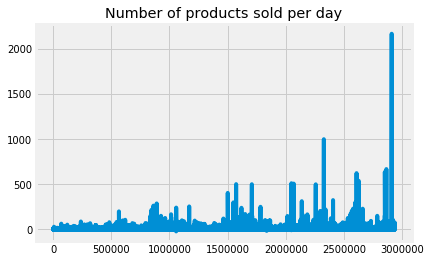

In [7]:
train.item_cnt_day.plot()
plt.title("Number of products sold per day");

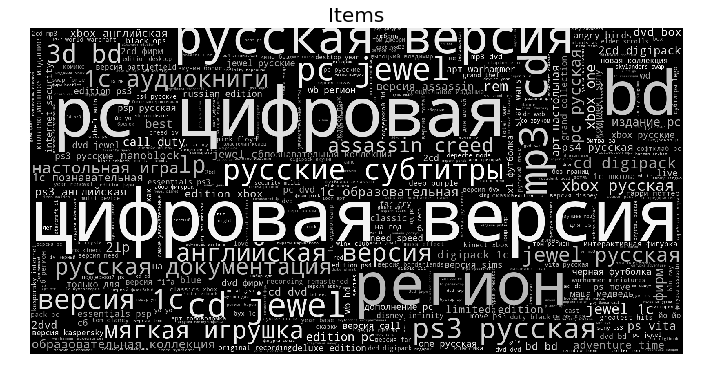

In [9]:
from wordcloud import WordCloud
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

item = ' '.join(items.item_name).lower()
# wordcloud for display address
plt.figure(figsize=(12,6))
wc = WordCloud(background_color='black', max_font_size=200,
                            width=1600,
                            height=800,
                            max_words=400,
                            relative_scaling=.5).generate(item)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
#plt.imshow(wc)
plt.title("Items", fontsize=20)
plt.savefig('items-wordcloud.png')
plt.axis("off");